In [1]:
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
data = yf.download("AAPL", start="2019-01-01", end="2024-01-01")
print(data.tail())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-22  195.179993  195.410004  192.970001  193.600006  192.656189   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.108856   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.208359   
2023-12-28  194.139999  194.660004  193.169998  193.580002  192.636261   
2023-12-29  193.899994  194.399994  191.729996  192.529999  191.591385   

              Volume  
Date                  
2023-12-22  37122800  
2023-12-26  28919300  
2023-12-27  48087700  
2023-12-28  34049900  
2023-12-29  42628800  


**Model Naive bayes**

[*********************100%%**********************]  1 of 1 completed


RMSE: 33.34037231309504


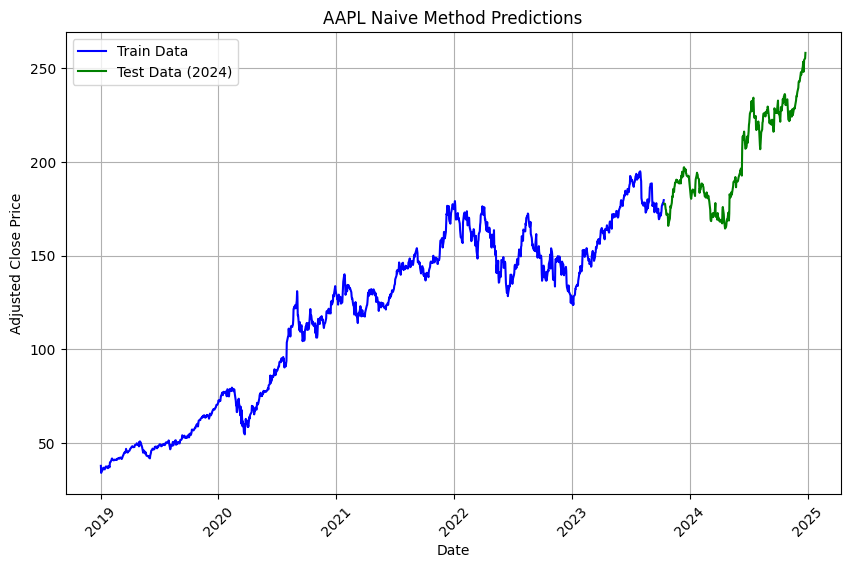

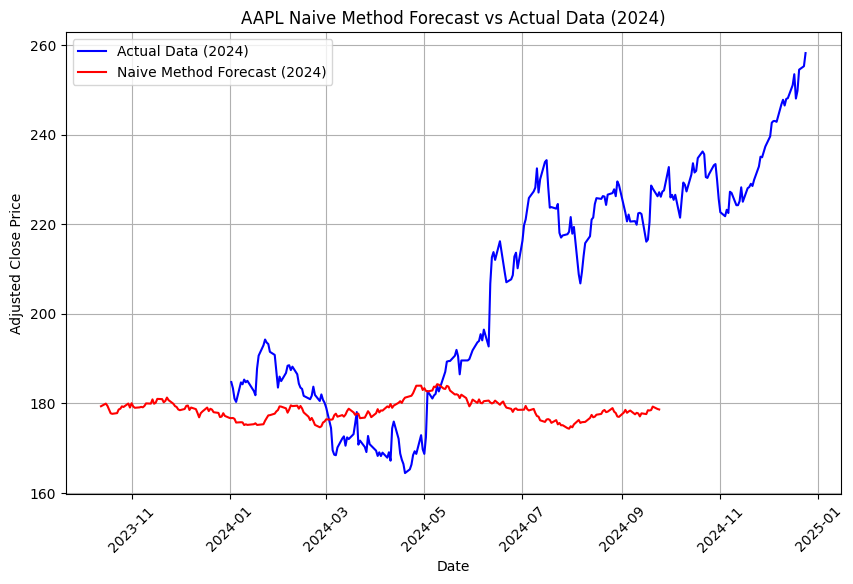

RMSE for 2024: 37.0807540527852


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import random

# Update data hingga 2024
data = yf.download("AAPL", start="2019-01-01", end="2024-12-31")

# Membagi data menjadi train (80%) dan test (20%)
train_size = int(len(data) * 0.8)
train_data = data["Adj Close"].iloc[:train_size]
test_data = data["Adj Close"].iloc[train_size:]

# Fungsi untuk membuat prediksi menggunakan metode naive
def naive_method(train_data, test_data):
    last_value = train_data.iloc[-1]
    predictions = pd.Series([last_value] * len(test_data), index=test_data.index)
    return predictions

# Prediksi menggunakan metode naive
predictions = naive_method(train_data, test_data)

# Menghitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"RMSE: {rmse}")

# Visualisasi data pelatihan dan prediksi pada data pengujian
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train Data', color='blue')
plt.plot(test_data, label='Test Data (2024)', color='green')
plt.title('AAPL Naive Method Predictions')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Fungsi untuk forecast menggunakan metode naive
def naive_forecast(data, forecast_period):
    last_value = data.iloc[-1]
    forecast_values = []
    for _ in range(forecast_period):
        variation = random.uniform(-1, 1)
        forecast = last_value + variation
        forecast_values.append(forecast)
        last_value = forecast

    forecast_values = pd.Series(forecast_values, index=pd.date_range(data.index[-1], periods=forecast_period + 1, freq='B')[1:])
    return forecast_values

# Pisahkan data aktual untuk 2024
actual_2024 = data["Adj Close"]['2024-01-01':]

# Forecast menggunakan metode naive
forecast_period = len(actual_2024)  # Sesuaikan periode forecast dengan data aktual
forecast_values = naive_forecast(data["Adj Close"].iloc[:train_size], forecast_period)

# Visualisasi forecast vs actual data 2024
plt.figure(figsize=(10, 6))
plt.plot(actual_2024, label='Actual Data (2024)', color='blue')
plt.plot(forecast_values, label='Naive Method Forecast (2024)', color='red')
plt.title('AAPL Naive Method Forecast vs Actual Data (2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Evaluasi RMSE dengan data aktual 2024
if len(forecast_values) == len(actual_2024):
    rmse_2024 = np.sqrt(mean_squared_error(actual_2024, forecast_values))
    print(f"RMSE for 2024: {rmse_2024}")
else:
    print("Forecast and actual data lengths do not match!")


**Model ARIMA**

[*********************100%%**********************]  1 of 1 completed


ADF Statistic: -1.205000332559903
p-value: 0.6714410046272523
Data tidak stasioner, lakukan differencing...


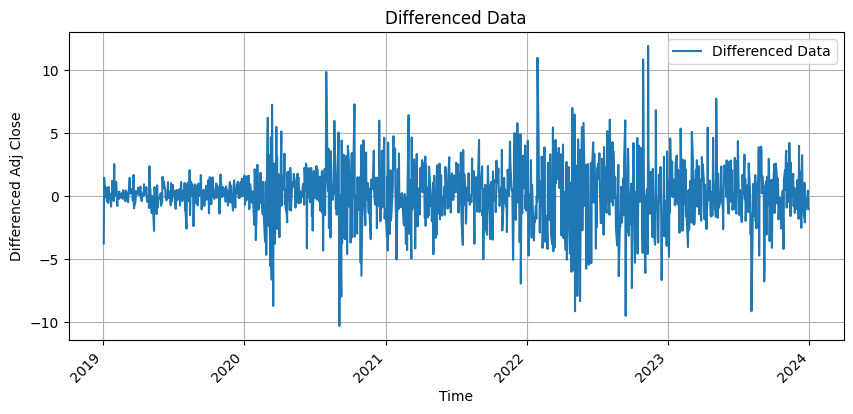

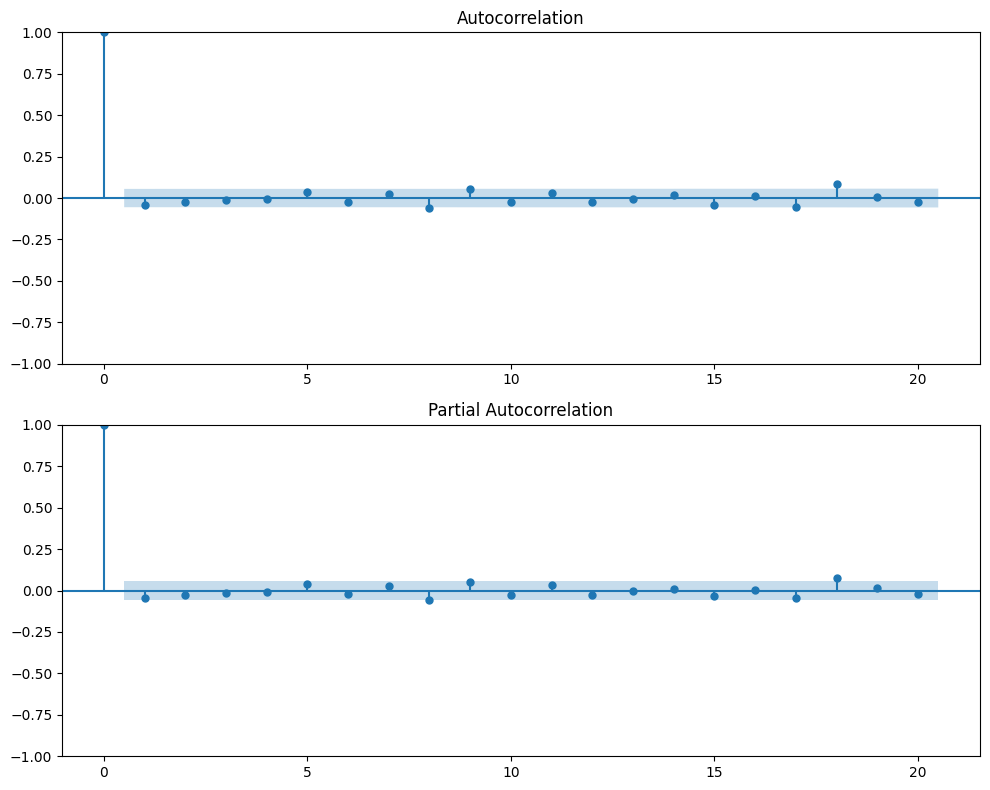

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5722.566, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5721.741, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5721.528, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5721.410, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5723.141, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5722.609, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5724.483, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5723.135, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.458 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2857.705
Date:                Wed, 25 Dec 2024   AIC                           5721.410
Time:                        22:33:0

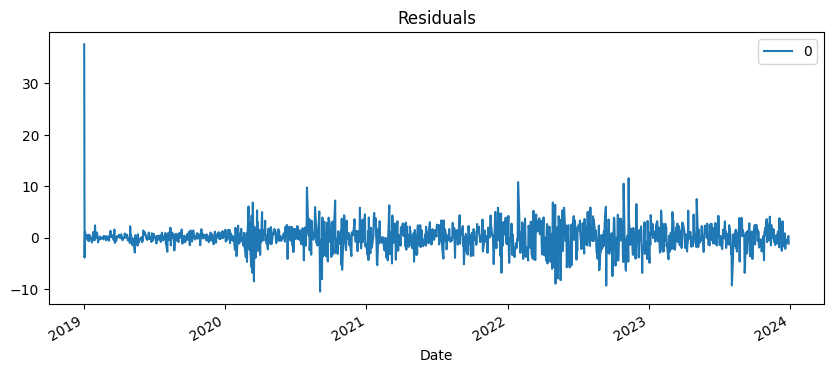

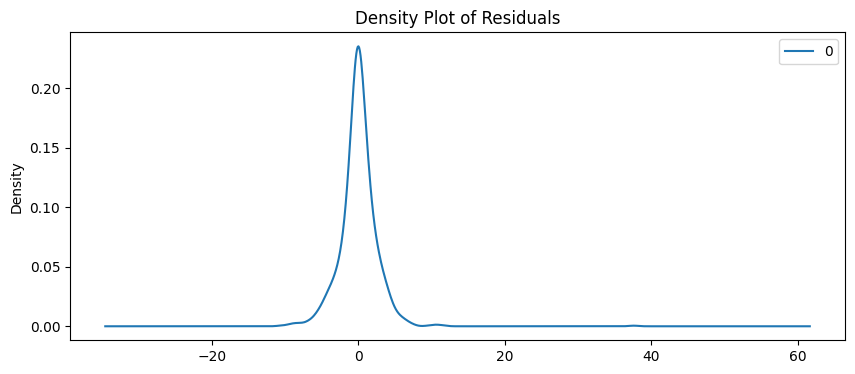

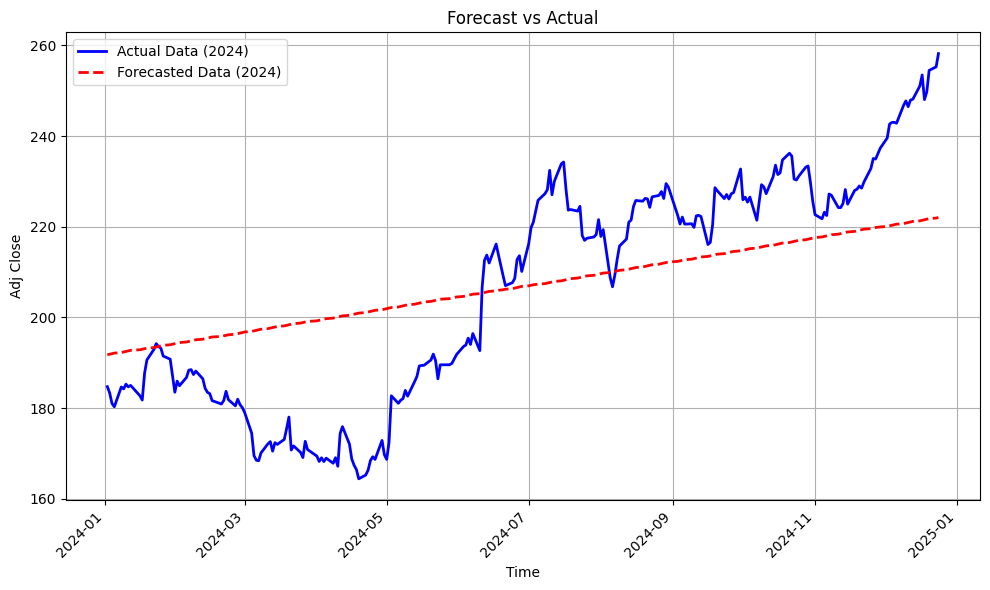

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import yfinance as yf

# Unduh data dari Yahoo Finance
data = yf.download("AAPL", start="2019-01-01", end="2024-12-31")
series = data["Adj Close"]

# Split data menjadi train (2019-2023) dan test (2024)
train = series[:'2023']
test = series['2024']

# Cek stationarity
result = adfuller(train)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("Data tidak stasioner, lakukan differencing...")
else:
    print("Data stasioner, lanjutkan ke modeling.")

# Differencing untuk membuat data stasioner 
diff = train.diff().dropna()

# Plot differenced data
plt.figure(figsize=(10, 4))
plt.plot(diff, label="Differenced Data")
plt.title("Differenced Data")
plt.xlabel("Time")
plt.ylabel("Differenced Adj Close")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()

# ACF dan PACF
f, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(diff, lags=20, ax=ax[0])
plot_pacf(diff, lags=20, ax=ax[1])
plt.tight_layout()
plt.show()
# Cari parameter ARIMA terbaik dengan Auto ARIMA
stepwise_fit = auto_arima(train, start_p=1, start_q=1,
                          max_p=5, max_q=5, m=12,
                          start_P=0, seasonal=False,
                          d=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True, stepwise=True)

print(stepwise_fit.summary())

# Forecasting dengan model ARIMA terbaik
forecast = stepwise_fit.predict(n_periods=len(test))
forecast_index = test.index

# Evaluasi performa
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.3f}")

# Plot residuals
residuals = pd.DataFrame(stepwise_fit.resid())
residuals.plot(title="Residuals", figsize=(10, 4))
plt.show()
residuals.plot(kind='kde', title="Density Plot of Residuals", figsize=(10, 4))
plt.show()

# Visualisasi hasil prediksi dan data aktual
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label="Actual Data (2024)", color="blue", linewidth=2)
plt.plot(forecast_index, forecast, label="Forecasted Data (2024)", color="red", linestyle="--", linewidth=2)
plt.title("Forecast vs Actual")
plt.xlabel("Time")
plt.ylabel("Adj Close")
plt.xticks(rotation=45, ha='right')
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

**Model LSTM(Long Short-Term Memory)**

[*********************100%%**********************]  1 of 1 completed


Epoch 1/20
38/38 [==============================] - 7s 76ms/step - loss: 0.0261
Epoch 2/20
38/38 [==============================] - 3s 76ms/step - loss: 0.0028
Epoch 3/20
38/38 [==============================] - 3s 77ms/step - loss: 0.0024
Epoch 4/20
38/38 [==============================] - 3s 76ms/step - loss: 0.0024
Epoch 5/20
38/38 [==============================] - 3s 73ms/step - loss: 0.0021
Epoch 6/20
38/38 [==============================] - 2s 61ms/step - loss: 0.0021
Epoch 7/20
38/38 [==============================] - 2s 64ms/step - loss: 0.0021
Epoch 8/20
38/38 [==============================] - 3s 68ms/step - loss: 0.0019
Epoch 9/20
38/38 [==============================] - 3s 76ms/step - loss: 0.0018
Epoch 10/20
38/38 [==============================] - 3s 73ms/step - loss: 0.0018
Epoch 11/20
38/38 [==============================] - 3s 74ms/step - loss: 0.0018
Epoch 12/20
38/38 [==============================] - 3s 73ms/step - loss: 0.0016
Epoch 13/20
38/38 [==================

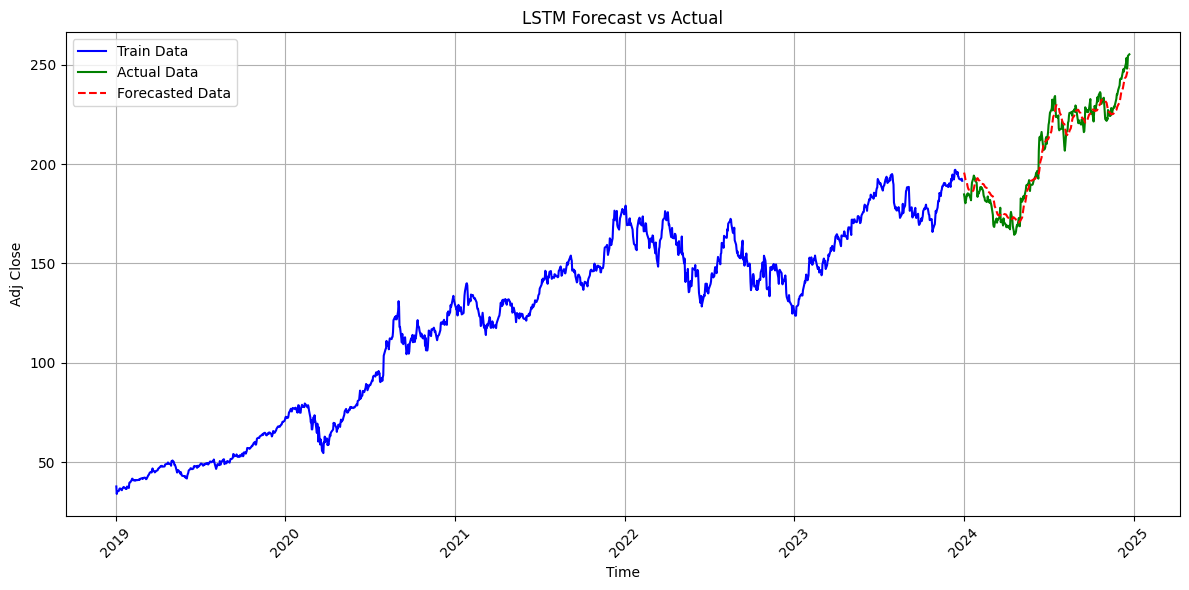


Prediksi vs Aktual Harga Saham AAPL (2024):
2024-03-28: Prediksi = 195.72, Aktual = 184.73
2024-04-01: Prediksi = 194.87, Aktual = 183.35
2024-04-02: Prediksi = 193.69, Aktual = 181.02
2024-04-03: Prediksi = 192.24, Aktual = 180.30
2024-04-04: Prediksi = 190.65, Aktual = 184.66
2024-04-05: Prediksi = 189.38, Aktual = 184.24
2024-04-08: Prediksi = 188.36, Aktual = 185.28
2024-04-09: Prediksi = 187.65, Aktual = 184.69
2024-04-10: Prediksi = 187.14, Aktual = 185.01
2024-04-11: Prediksi = 186.83, Aktual = 182.73
2024-04-12: Prediksi = 186.50, Aktual = 181.79
2024-04-15: Prediksi = 186.13, Aktual = 187.71
2024-04-16: Prediksi = 186.17, Aktual = 190.63
2024-04-17: Prediksi = 186.65, Aktual = 192.94
2024-04-18: Prediksi = 187.54, Aktual = 194.23
2024-04-19: Prediksi = 188.71, Aktual = 193.55
2024-04-22: Prediksi = 189.95, Aktual = 193.22
2024-04-23: Prediksi = 191.12, Aktual = 191.48
2024-04-24: Prediksi = 192.05, Aktual = 190.80
2024-04-25: Prediksi = 192.73, Aktual = 187.12
2024-04-26: Pre

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import yfinance as yf

data = yf.download("AAPL", start="2019-01-01", end="2024-12-31")
series = data["Adj Close"]

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(series.values.reshape(-1, 1))

# Fungsi untuk membuat dataset time series dengan lag
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Parameter untuk LSTM
time_step = 60

# Split data menjadi train (2019-2023) dan test (2024)
train_size = len(series[:'2023'])
train_data, test_data = data_scaled[:train_size], data_scaled[train_size - time_step:]

# Dataset untuk LSTM
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Mengubahbah bentuk data menjadi [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Bangun model LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
model.save('aapl_stock_prediction_model.h5')
print("Model telah disimpan sebagai 'aapl_stock_prediction_model.h5'")

# Prediksi
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inversi transformasi untuk mendapatkan nilai asli
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluasi performa
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f"Train RMSE: {train_rmse:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(series.index[:train_size], scaler.inverse_transform(train_data), label="Train Data", color="blue")
plt.plot(series.index[train_size:train_size + len(test_predict)], scaler.inverse_transform(test_data[time_step:time_step + len(test_predict)]), label="Actual Data", color="green")
plt.plot(series.index[train_size:train_size + len(test_predict)], test_predict, label="Forecasted Data", color="red", linestyle="--")
plt.title("LSTM Forecast vs Actual")
plt.xlabel("Time")
plt.ylabel("Adj Close")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print("\nPrediksi vs Aktual Harga Saham AAPL (2024):")
for i in range(len(test_predict)):
    if train_size + i + time_step < len(series):
        date = series.index[train_size + i + time_step]  # Mengambil tanggal yang sesuai
        pred = test_predict[i][0]
        actual = y_test[i][0]
        print(f"{date.strftime('%Y-%m-%d')}: Prediksi = {pred:.2f}, Aktual = {actual:.2f}")
    else:
        break


**menggunakan LSTM untuk forecasting saham 2025-2027**

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 23ms/step


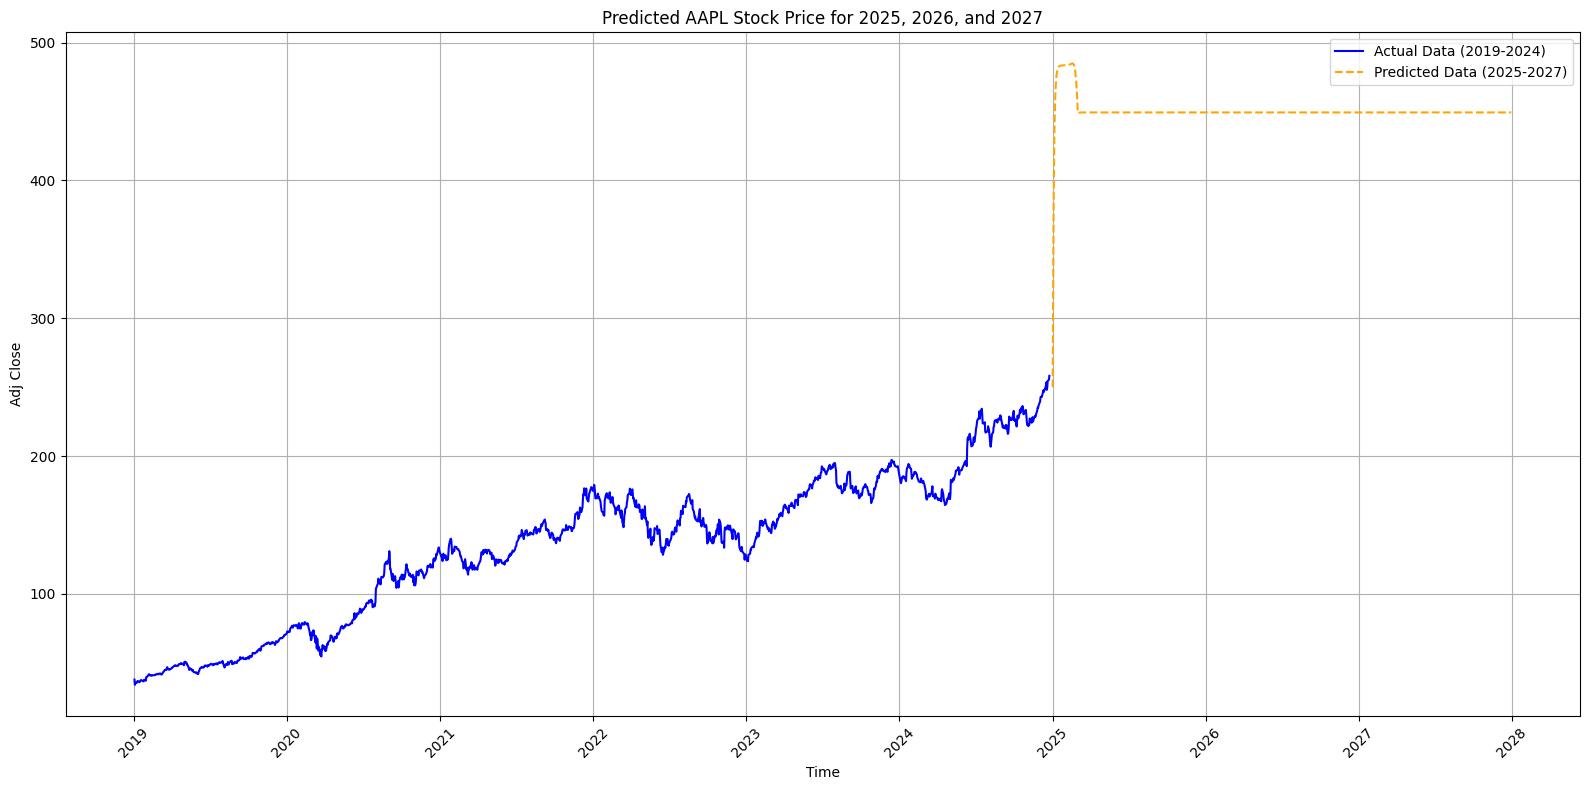

2025-01-01: Prediksi = 249.98
2025-01-02: Prediksi = 317.53
2025-01-03: Prediksi = 370.86
2025-01-04: Prediksi = 407.31
2025-01-05: Prediksi = 431.70
2025-01-06: Prediksi = 448.12
2025-01-07: Prediksi = 459.26
2025-01-08: Prediksi = 466.88
2025-01-09: Prediksi = 472.11
2025-01-10: Prediksi = 475.71
2025-01-11: Prediksi = 478.18
2025-01-12: Prediksi = 479.88
2025-01-13: Prediksi = 481.05
2025-01-14: Prediksi = 481.84
2025-01-15: Prediksi = 482.38
2025-01-16: Prediksi = 482.75
2025-01-17: Prediksi = 482.99
2025-01-18: Prediksi = 483.15
2025-01-19: Prediksi = 483.26
2025-01-20: Prediksi = 483.32
2025-01-21: Prediksi = 483.37
2025-01-22: Prediksi = 483.40
2025-01-23: Prediksi = 483.41
2025-01-24: Prediksi = 483.42
2025-01-25: Prediksi = 483.43
2025-01-26: Prediksi = 483.44
2025-01-27: Prediksi = 483.44
2025-01-28: Prediksi = 483.45
2025-01-29: Prediksi = 483.46
2025-01-30: Prediksi = 483.46
2025-01-31: Prediksi = 483.48
2025-02-01: Prediksi = 483.49
2025-02-02: Prediksi = 483.51
2025-02-03

In [27]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Muat model yang sudah disimpan
model = load_model('aapl_stock_prediction_model.h5')

# Unduh data dari Yahoo Finance hingga Desember 2024
data = yf.download("AAPL", start="2019-01-01", end="2024-12-31")
series = data["Adj Close"]

# Normalisasi data dengan MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(series.values.reshape(-1, 1))

# Ambil 60 hari terakhir untuk prediksi awal
last_60_days = data_scaled[-60:]

# Prediksi untuk 2025, 2026, dan 2027
predictions = []  # Menyimpan semua prediksi dari 2025 hingga 2027
start_year = 2025
years_to_predict = 3

# Lakukan prediksi per tahun
for year in range(years_to_predict):
    for i in range(365):  # Prediksi selama 365 hari untuk setiap tahun
        input_seq = last_60_days.reshape(1, 60, 1)  # Ubah bentuk data untuk LSTM
        pred_price = model.predict(input_seq)  # Prediksi harga saham
        pred_price = scaler.inverse_transform(pred_price)  # Kembalikan ke harga asli
        
        # Simpan prediksi
        predictions.append(pred_price[0][0])
        
        # Update last_60_days untuk prediksi berikutnya
        last_60_days = np.append(last_60_days[1:], pred_price, axis=0)

# Buat tanggal untuk 2025 hingga 2027
predicted_dates = pd.date_range(start='2025-01-01', periods=len(predictions), freq='D')

# Visualisasi hasil prediksi untuk 2025-2027
plt.figure(figsize=(16, 8))
plt.plot(series.index, scaler.inverse_transform(data_scaled), label="Actual Data (2019-2024)", color="blue")
plt.plot(predicted_dates, predictions, label="Predicted Data (2025-2027)", color="orange", linestyle="--")
plt.title("Predicted AAPL Stock Price for 2025, 2026, and 2027")
plt.xlabel("Time")
plt.ylabel("Adj Close")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Print Prediksi untuk 2025-2027
current_year = start_year
current_day = 1
predictions_by_year = {2025: [], 2026: [], 2027: []}  # Dictionary untuk menyimpan prediksi per tahun

for i, prediction in enumerate(predictions):
    print(f"{predicted_dates[i].strftime('%Y-%m-%d')}: Prediksi = {prediction:.2f}")
    predictions_by_year[current_year].append(prediction)
    current_day += 1
    if current_day > 365:
        current_day = 1
        current_year += 1

# Hitung rata-rata prediksi per tahun
for year in predictions_by_year:
    avg_prediction = np.mean(predictions_by_year[year])
    print(f"Rata-rata prediksi untuk tahun {year}: {avg_prediction:.2f}")
